In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pyslammer as slam
from cycler import cycler

%matplotlib widget

plt.style.use(slam.psfigstyle)


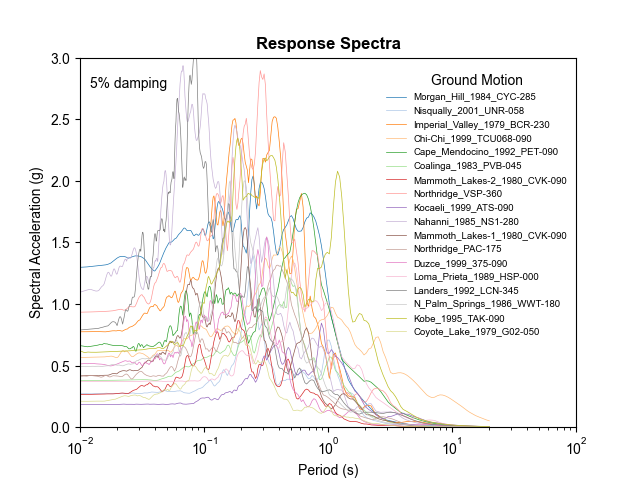

In [2]:
# Navigate to ground motion suite response spectra files
current_dir = os.getcwd()
folder_path = Path(current_dir).resolve().parents[1] / "tests" / "pySLAMMER_suite_resp"
csv_files = list(folder_path.glob("*.csv"))

# Read each CSV file into a DataFrame and store them in a list
freq_index = 0
resp_index = 1
spectra = {}
for csv_file in csv_files:
    data = np.loadtxt(csv_file, delimiter=",", skiprows=2)
    # convert response from cm/s^2 to g's
    data[:, resp_index] = data[:, resp_index] / 981
    spectra[csv_file.name.strip(".csv")] = data

# Initialize the plot
fig, ax = plt.subplots()
ax.set_prop_cycle(cycler(color=plt.cm.tab20.colors))
for motion in spectra:
    ax.plot(
        1 / spectra[motion][:, freq_index],
        spectra[motion][:, resp_index],
        label=motion,
        linewidth=0.5,
    )

ax.text(0.012, 2.75, "5% damping")
# Add labels, legend, and grid
ax.set_xlabel("Period (s)")
ax.set_ylabel("Spectral Acceleration (g)")
ax.set_title("Response Spectra")
ax.set_xscale("log")
ax.set_ylim(0, 3)
ax.set_xlim(0.01, 100)

ax.legend(
    loc="center left",
    bbox_to_anchor=(0.6, 0.6),
    fontsize="x-small",
    title="Ground Motion",
    title_fontsize="medium",
    frameon=False,
)

plt.show()


In [3]:
plt.savefig("resp_spectra.pdf", dpi=600, bbox_inches="tight")
